In [1]:
import sys
sys.path.insert(0,'C:\\Users\\Syahrir Ridha\\PycharmProjects\\NET_Solver\\')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *

In [2]:
data = pd.read_csv('data.csv')

In [3]:
xcd5 = data.loc[(data['test_fluid']=='XCD5')&(data['annulus']=='annulus_1')]

In [4]:
# convert data into SI 
# dia (inch) >> meters [add the inner and outer diameters]
# >>>>>> 1 inch = 0.0254 meters
xcd5['r_out'] = 1.38 * 0.0254
xcd5['r_in'] = 0.38 * 0.0254
#xcd5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
# flowrate(gpm) >> m3/s
# >>>>> 1GPM = 0.0000630901964 m3/s
xcd5['flow_rate_gpm'] = xcd5['flow_rate_gpm']*0.0000630901964 
#xcd5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# diff press (inchH20) >> KPa/meter
# convert inch h20 into KPa ( 1 inchH20 = 248.84Pa >>> 1 inchH20 = 0.24884 KPa )
#xcd5['diff_p'] = (0.24884/5.4864)*xcd5['diff_p'] # for KPa
xcd5['diff_p'] = (248.84/5.4864)*xcd5['diff_p'] # for Pa

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
xcd5

,flow_rate_gpm,annulus,ecc,di/do,test_fluid,shear_pa,k,m,diff_p,r_out,r_in
321,0.001210,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1905.850248,0.035052,0.009652
322,0.001149,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1856.412438,0.035052,0.009652
323,0.001100,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1816.045786,0.035052,0.009652
324,0.001043,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1785.657407,0.035052,0.009652
325,0.000979,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1743.022966,0.035052,0.009652
326,0.000897,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1715.355935,0.035052,0.009652
327,0.000834,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1680.885535,0.035052,0.009652
328,0.000771,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1640.518883,0.035052,0.009652
329,0.000699,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1598.791557,0.035052,0.009652
330,0.000620,annulus_1,1.0,0.27,XCD5,6.5,0.64,0.48,1561.146253,0.035052,0.009652


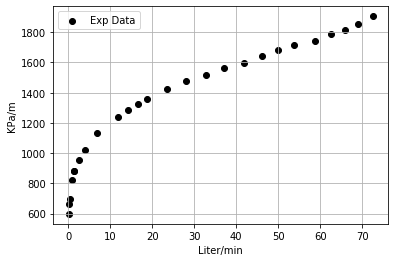

In [8]:
plt.scatter(xcd5['flow_rate_gpm']*60000, xcd5['diff_p'], color='black', label='Exp Data')
plt.grid('both')
plt.xlabel('Liter/min')
plt.ylabel('KPa/m')
plt.legend();

In [9]:
# check the non dimensionalization

In [10]:
non_dim = Dimensional(xcd5['r_out'], xcd5['k'], xcd5['m'], density=1000)

In [11]:
non_dim.non_dim_radius(xcd5['r_in'])

321    0.275362
322    0.275362
323    0.275362
324    0.275362
325    0.275362
326    0.275362
327    0.275362
328    0.275362
329    0.275362
330    0.275362
331    0.275362
332    0.275362
333    0.275362
334    0.275362
335    0.275362
336    0.275362
337    0.275362
338    0.275362
339    0.275362
340    0.275362
341    0.275362
342    0.275362
343    0.275362
344    0.275362
345    0.275362
346    0.275362
dtype: float64

In [12]:
non_dim.non_dim_press(xcd5['diff_p'])

321    128.253017
322    124.926130
323    122.209681
324    120.164714
325    117.295656
326    115.433820
327    113.114156
328    110.397707
329    107.589692
330    105.056374
331    102.278882
332     99.592955
333     95.655630
334     91.260476
335     89.123943
336     86.407495
337     83.568958
338     76.152137
339     68.521662
340     64.248596
341     59.426136
342     59.517702
343     55.427768
344     47.034246
345     44.684059
346     40.258384
dtype: float64

In [13]:
non_dim.non_dim_volume(xcd5['flow_rate_gpm'])

321    43.150085
322    40.992851
323    39.224179
324    37.210491
325    34.901611
326    31.985250
327    29.752643
328    27.489212
329    24.941840
330    22.099501
331    19.520855
332    16.723965
333    13.957675
334    11.195659
335     9.810826
336     8.436568
337     7.020686
338     4.101625
339     2.425651
340     1.469655
341     0.850924
342     0.830225
343     0.509609
344     0.189219
345     0.130271
346     0.067723
dtype: float64

In [14]:
non_dim.non_dim_yield(xcd5['shear_pa'])

321    12.478988
322    12.478988
323    12.478988
324    12.478988
325    12.478988
326    12.478988
327    12.478988
328    12.478988
329    12.478988
330    12.478988
331    12.478988
332    12.478988
333    12.478988
334    12.478988
335    12.478988
336    12.478988
337    12.478988
338    12.478988
339    12.478988
340    12.478988
341    12.478988
342    12.478988
343    12.478988
344    12.478988
345    12.478988
346    12.478988
dtype: float64